In [2]:
from fastai.vision import *

In [3]:
def input_file():
    with open('input.txt','r') as inputfile:
        dataset_name = inputfile.readline().rstrip()
        print('Dataset name: ', dataset_name)
        n = int(inputfile.readline().rstrip())
        print('Number of image classes: ', n)
        for iclass in range(n):
            img_classes.append(inputfile.readline().rstrip())
            print('Class {}: {}'.format(iclass+1, img_classes[iclass]))
        inputfile.close()
        return dataset_name, n, img_classes 

In [4]:
#variables
datast_name = ''
n = 0

img_classes = []
img_urls = {}
#input
print('Input section: ')
dataset_name, n, img_classes = input_file()
path=Path('dataset/'+dataset_name)
print()

Input section: 
Dataset name:  batman
Number of image classes:  3
Class 1: batman cartoon
Class 2: batman christian bale
Class 3: batman ben affleck



In [5]:
#directory
print('Current directory: ', path.ls())
print()

Current directory:  [PosixPath('dataset/batman/batman ben affleck'), PosixPath('dataset/batman/batman ben affleck.csv'), PosixPath('dataset/batman/batman cartoon'), PosixPath('dataset/batman/batman cartoon.csv'), PosixPath('dataset/batman/batman christian bale'), PosixPath('dataset/batman/batman christian bale.csv')]



In [6]:
#display data
print('Displaying data ...')
np.random.seed(42)
print('Init ImageDataBunch')
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
    ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
print('Data classes: ', data.classes)
print('Length of Training Dataset: ', len(data.train_ds))
print('Length of Validation Dataset: ', len(data.valid_ds))
print()

Displaying data ...
Init ImageDataBunch
Data classes:  ['batman ben affleck', 'batman cartoon', 'batman christian bale']
Length of Training Dataset:  384
Length of Validation Dataset:  96



In [7]:
#train model
print('Training the model ...')
print('Define resnet34 CNN learner')
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
print('Start training')
learn.fit_one_cycle(4)

Training the model ...
Define resnet34 CNN learner
Start training


epoch,train_loss,valid_loss,error_rate,time
0,1.751092,0.650236,0.281250,00:44
1,1.261632,0.558155,0.229167,00:45
2,1.013609,0.588875,0.270833,00:44
3,0.874863,0.587416,0.239583,00:44


In [8]:
learn.save('stage1')

In [9]:
learn.unfreeze()

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


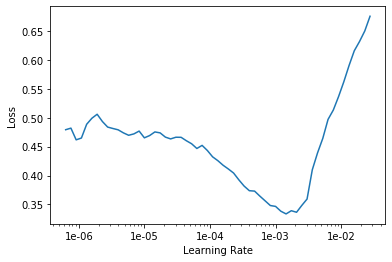

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.473341,0.605764,0.260417,01:01
1,0.437928,0.618679,0.218750,01:06


In [13]:
learn.save('stage2')

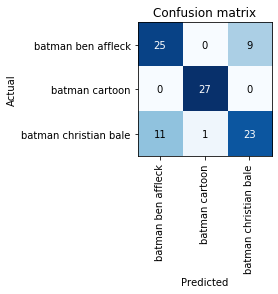

In [15]:
learn.load('stage2')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [16]:
from fastai.widgets import *

In [17]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [18]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage2');


In [74]:


ds, idxs = DatasetFormatter().from_toplosses(learn_cln)



In [75]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [77]:
data.valid_ds.x.items[8]

PosixPath('dataset/batman/batman ben affleck/00000074.jpg')

In [39]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)


Getting activations...


Computing similarities...


In [40]:
ImageCleaner(ds, idxs, path, duplicates=True)


Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [41]:
learn.export()

In [42]:
defaults.device = torch.device('cpu')

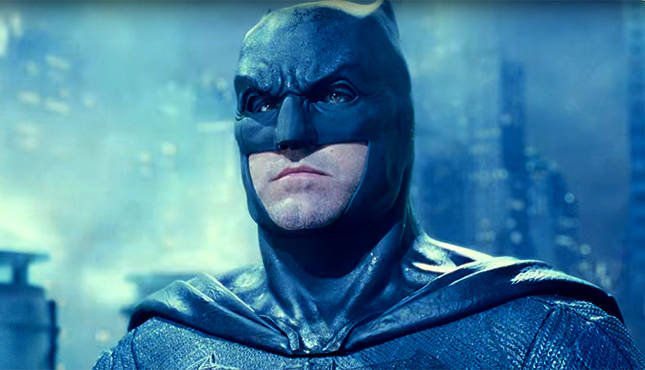

In [71]:
img = open_image(path/'valid'/'9.jpg')
img

In [72]:
res = learn.predict(img)

In [73]:
res

(Category batman ben affleck,
 tensor(0),
 tensor([9.9975e-01, 4.2267e-05, 2.1220e-04]))